<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/HW_2_1_Feature_analysis_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
medical_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Провести дослідження чи є зв'язок між кожною з ознак та цільовою змінною.
2. Дослідити вплив кількох ознак на цільову змінну.
3. Вивести формулу пливу ознак на charges, та постаратися підібрати коефіцієнти.

(важко придумувати, коли знаєш, як на справді все має бути)

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [3]:
medical_df.sex.value_counts()

,count
sex,
male,676
female,662


In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['pink', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

З вищенаведеного графіку можна зробити наступні спостереження:

- медіанні значення для жінок і чоловіків досить близькі
- високі витрати для чоловіків зустрічаються частіше, ніж для жінок

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['orange', 'red', 'blue', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

З вищенаведеного графіку можна зробити наступні спостереження:

- медіанні значення для для різних регіонів досить близькі
- підвищені внески найбільші в southeast регіоні, найменші в southwest регіоні.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [6]:
medical_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [7]:
px.histogram(medical_df, x='smoker', color='region', color_discrete_sequence=['orange', 'red', 'blue', 'green'], title='Smoker')

З вищенаведеного графіку можна зробити наступні спостереження:

- кількість некурців в усіх регіонах досить близька (від 257 до 273)
- кількість курців в регіоні southeast найвища - 91, в регіонах southwest і northwest найнижча - 58.

In [8]:
medical_df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [9]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

In [10]:
medical_df.groupby('children')['smoker'].value_counts(normalize = True).round(2) * 100

children  smoker
0         no        80.0
          yes       20.0
1         no        81.0
          yes       19.0
2         no        77.0
          yes       23.0
3         no        75.0
          yes       25.0
4         no        88.0
          yes       12.0
5         no        94.0
          yes        6.0
Name: proportion, dtype: float64

З вищенаведеного графіку можна зробити наступні спостереження:

- розподіл даних по кількості дітей нерівномірний тому порівнювати кількість курців і некурців в такому розподілі не дуже інформативно.
- якщо згрупувати клієнтів в залежності від кількості дітей, то відсоток курців для 0 і 1 дитини близький до всього розподілу і дорівнює 20 %, для 2 і 3 дітей трохи вищий, рівний 23 - 25 %. Для клієнтів, які мають 4 або 5 дітей найнижчий, відповідно 12% і 6 %.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [11]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                color='children',
                points='all',
                box=True,
                hover_data=['children'],
                title='Charges Distribution by Children')
fig.update_traces(marker_size=5)
fig.show()

In [12]:
fig = px.violin(medical_df,
                x='smoker',
                y='charges',
                color='children',
                box=True,
                points='all',
                hover_data=['children'],
                title='Charges Distribution by Children and Smoker')
fig.update_traces(marker_size=5)
fig.show()

З вищенаведених графіків можна зробити наступні спостереження:

- Кількість дітей у клієнта суттєво не впливає на розмір внесків. Для випадків з 5 дітьми вони навіть менші.
- Для курців внески суттєво більші незалежно від кількості дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [13]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [14]:
def estimate_charges(age, w, b):
    return w * age + b

In [15]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

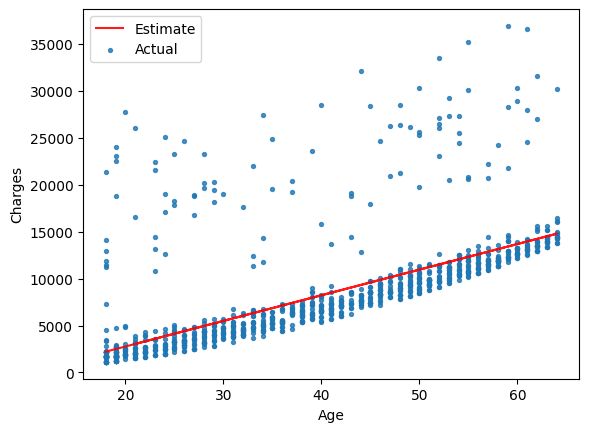

In [16]:
try_parameters(non_smoker_df, 273, -2700)

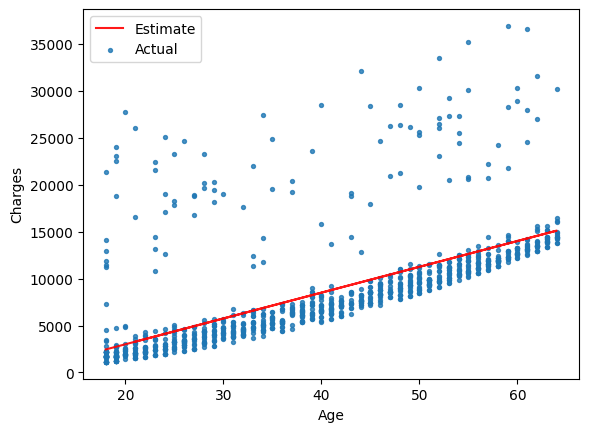

In [17]:
try_parameters(non_smoker_df, 275, -2500)

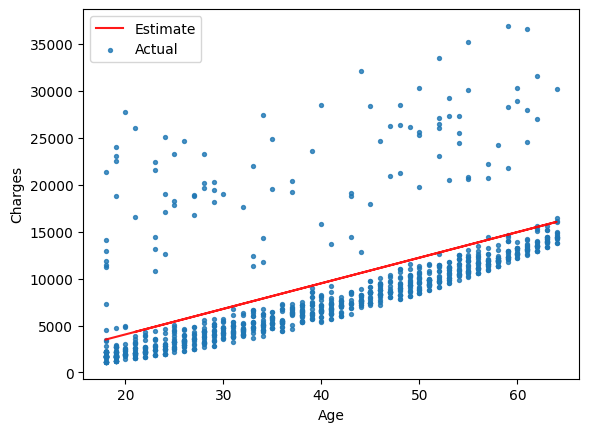

In [18]:
try_parameters(non_smoker_df, 272.5, -1400)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [19]:
import numpy as np
def rmse(predict, target):
  return np.sqrt(np.mean(np.square(target - predict)))

In [20]:
for w, b in[(273, -2700), (275, -2500), (272.5, -1400)]:
  predict = estimate_charges(non_smoker_df.age, w, b)
  target = non_smoker_df.charges
  print(f'Для моделі charges={w}*x{b}   RMSE = {rmse(predict, target).round(0)}')

Для моделі charges=273*x-2700   RMSE = 4679.0
Для моделі charges=275*x-2500   RMSE = 4665.0
Для моделі charges=272.5*x-1400   RMSE = 4749.0


Висновки:

найкращий результат для w = 275,  b = -2500,  RMSE = 4665.0

Лінія має проходити досить близько до скупчення даних в нижній частині графіка, оскільки їх там багато і сума великої кількості маленьких значень може дати велику помилку.  При цьому потрібно враховувати розсіяні значення в верхній частині графіка.

https://colab.research.google.com/drive/1YtDbJ5hurZ8qqZuwVUofOZbDUbOoVcUI?usp=sharing